In [109]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict as odict

Load the SN light curve fits that were generated in [this notebook](https://github.com/djreiss/AnalyzeSN/blob/master/notebooks/LC%20fitting%202.ipynb).

This is an array of "SN fit" objects. An example is printed at the end of this cell:

In [110]:
import sys
import gzip, pickle

if sys.version.startswith('2'):
    snFits = pickle.load(gzip.GzipFile('snFits.p.gz'))
else:
    snFits = pickle.load(gzip.GzipFile('snFits.p.gz'),
                     encoding='latin1')
print(len(snFits))
snf = [s for s in snFits.values() if s is not None]
print(len(snf))
snf[0]

1622
1549


z                                                        1.09799
t0                                                       51298.8
x0                                                   5.04702e-07
x1                                                       4.01727
c                                                       0.240365
hostebv                                                        0
hostr_v                                                      3.1
mwebv                                                          0
mwr_v                                                        3.1
mu                                                       15.5573
mu_var                                                  0.691992
inputParams    {'t0': 51295.2, 'x0': 5.88266e-07, 'x1': 0.304...
dtype: object

Use list comprehension to extract the redshift (`z`) and fitted distance modulus (`mu`) from each of the supernova light curve fits. Each of those becomes its own array of numbers.

Also extract `mu_var`. Need to do this in a loop since for some light curve fits `mu_var` doesn't exist (for a reason that I am not sure of right now).

In [111]:
z = np.array([s.z for s in snf])
mu = np.array([s.mu for s in snf])

mu_var = mu.copy() #np.array([s.mu_var for s in snf])
for i,s in enumerate(snf):
    try:
        mu_var[i] = s.mu_var
    except:
        mu_var[i] = 999

# Here, we didn't fit z so zz and z will be identical.
zz = z.copy() #np.array([s['inputParams'].get('z') for s in snf]) 
for i,s in enumerate(snf):
    try:
        zz[i] = s['inputParams'].get('z')
    except:
        zz[i] = 999

Filter the data to remove points that are probably way wrong (e.g. too high or too low `mu`).

TODO: we need to look at some of these bad points and understand why their fits gave incorrect results.

In [112]:
z = z[(mu > 0) & (mu < 19)]
zz = zz[(mu > 0) & (mu < 19)]
mu = mu[(mu > 0) & (mu < 19)]
mu_var = mu_var[(mu > 0) & (mu < 19)]

C:\Users\maddi\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1549 but corresponding boolean dimension is 1439


Plot the Hubble diagram.

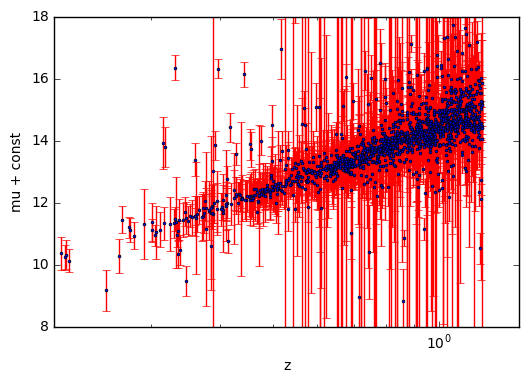

In [113]:
#plt.scatter(z, mu)
plt.errorbar(z, mu, yerr=np.sqrt(mu_var), fmt='o', ecolor='r', elinewidth=1, ms=2)
plt.xlabel('z')
plt.xscale('log')
plt.ylabel('mu + const')
plt.xlim((0.2,1.4))
plt.ylim((8,18));

The `mu`s computed above are offset by some constant that we do not know yet. Let's estimate that offset by computing a Hubble diagram for a model cosmology.

In [114]:
from astropy.cosmology import Planck15 as cosmo
mu = np.array([s.mu for s in snf])
x0 = np.array([s.x0 for s in snf])
x0 = x0[(mu > 0) & (mu < 19)]
x1 = np.array([s.x1 for s in snf])
x1 = x1[(mu > 0) & (mu < 19)]
c = np.array([s.c for s in snf])
c = c[(mu > 0) & (mu < 19)]
mu = mu[(mu > 0) & (mu < 19)]
muz = np.array(cosmo.distmod(z))

alpha = 0.14
beta = -3.11
M = -2.5 * np.log10(x0) + alpha * x1 + beta * c - muz
# plt.scatter(z, muz)
# plt.xlabel('z')
# plt.xscale('log')
# plt.xlim((0.2,1.4))
# plt.ylabel('mu')
# plt.ylim((39,45));

Compute the constant offset as the median of the differences between the cosmological `mu` and the fitted SN `mu`.

29.7558162588


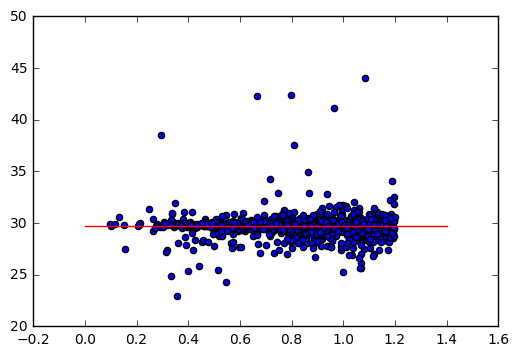

In [115]:
const = np.median(muz-mu)
print(const)
plt.scatter(z,muz-mu)
plt.plot([0,1.4],[const,const],'r')

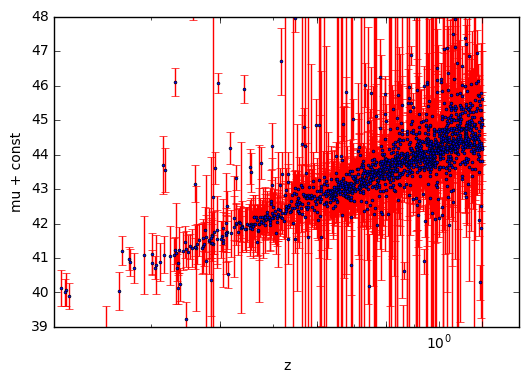

In [116]:
plt.errorbar(z, mu+const, yerr=np.sqrt(mu_var), fmt='o', ecolor='r', elinewidth=1, ms=2)
plt.xlabel('z')
plt.xscale('log')
plt.ylabel('mu + const')
plt.xlim((0.2,1.4))
plt.xticks(np.arange(0.2,1.4,0.2))
plt.ylim((39,48));

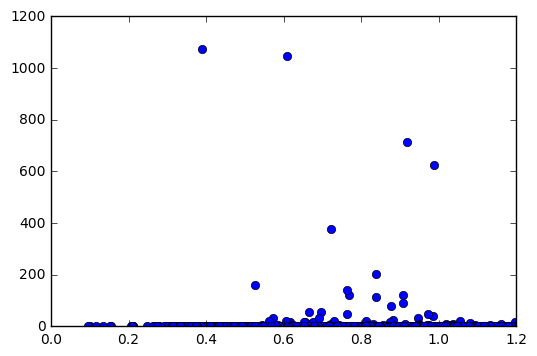

In [117]:
plt.plot(z, np.sqrt(mu_var), 'o')


In [118]:
import pandas as pd

In [119]:
df= pd.DataFrame(snFits)

In [120]:
df.head()

,10005,10018,10024,10034,10059,10087,10092,10135,10136,1014,...,9875,9893,9906,9919,9940,9956,9966,9996,9997,9998
c,-0.121929,None,0.136068,0.0450403,-0.313476,0.0462698,0.0988343,-0.0298518,0.0776311,-0.00395545,...,0.151322,0.0332876,0.0601968,-0.064084,-0.0992085,0.168553,0.224081,-0.0279898,-0.0690699,0.554351
hostebv,0,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hostr_v,3.1,None,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1
inputParams,"{'t0': 51366.4, 'x0': 2.33246e-06, 'x1': 0.316...",None,"{'t0': 49526.4, 'x0': 1.89643e-06, 'x1': -0.00...","{'t0': 49797.0, 'x0': 3.91948e-06, 'x1': 1.333...","{'t0': 52299.5, 'x0': 7.96518e-07, 'x1': -2.15...","{'t0': 51916.5, 'x0': 1.34099e-06, 'x1': -1.35...","{'t0': 51660.8, 'x0': 2.02691e-05, 'x1': 0.810...","{'t0': 52956.3, 'x0': 1.50645e-06, 'x1': -0.17...","{'t0': 51869.1, 'x0': 2.08861e-06, 'x1': -0.03...","{'t0': 52625.4, 'x0': 1.57086e-05, 'x1': -0.05...",...,"{'t0': 50537.5, 'x0': 1.49797e-06, 'x1': 0.749...","{'t0': 50317.4, 'x0': 5.31459e-06, 'x1': 0.939...","{'t0': 50247.6, 'x0': 8.27902e-06, 'x1': 1.859...","{'t0': 52795.5, 'x0': 5.27805e-06, 'x1': -0.88...","{'t0': 52282.4, 'x0': 1.59866e-05, 'x1': 0.300...","{'t0': 51434.1, 'x0': 1.5377e-06, 'x1': -2.071...","{'t0': 49728.8, 'x0': 3.29583e-06, 'x1': 1.077...","{'t0': 51182.1, 'x0': 6.8868e-06, 'x1': 1.9237...","{'t0': 51692.7, 'x0': 2.44391e-06, 'x1': -0.47...","{'t0': 52220.0, 'x0': 3.92665e-05, 'x1': -0.11..."
mu,14.4485,None,14.6638,14.293,15.3082,14.3719,18.5476,14.7065,13.6749,11.9806,...,17.3679,13.2705,12.6044,13.1048,12.4316,13.7975,13.3523,13.3476,14.0323,2.41581


In [121]:
df.transpose()
df=df.transpose()

In [122]:
results= df[['z','mu','mu_var']]
results.head()

,z,mu,mu_var
10005,0.968958,14.4485,0.253021
10018,None,None,None
10024,0.861278,14.6638,0.276984
10034,0.820012,14.293,0.301233
10059,1.041,15.3082,0.537081


In [123]:
lowz= results.query('z<.4')

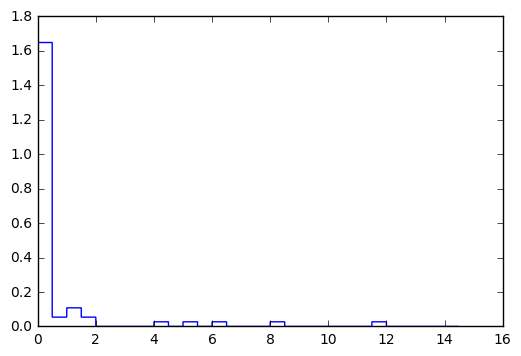

In [124]:
_ = plt.hist(lowz['mu_var'], bins=np.arange(0., 15, 0.5), histtype='step', normed=1)

In [125]:
highz= results.query('z>.7')

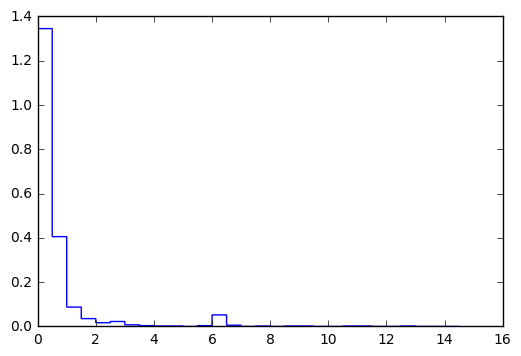

In [126]:
_ = plt.hist(highz['mu_var'], bins=np.arange(0., 15, 0.5), histtype='step', normed=1)

In [127]:
results['bindex']= results['z']//0.1

C:\Users\maddi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
results.head()

,z,mu,mu_var,bindex
10005,0.968958,14.4485,0.253021,9
10018,None,None,None,NaN
10024,0.861278,14.6638,0.276984,8
10034,0.820012,14.293,0.301233,8
10059,1.041,15.3082,0.537081,10


In [129]:
results[['z', 'mu_var', 'mu']] = results[['z', 'mu_var', 'mu']].astype(np.float)

C:\Users\maddi\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [130]:
dic = dict(mu_var=np.mean, )

In [131]:
mean=results.groupby('bindex').agg(dic)
mean

,mu_var
bindex,
0.0,0.139478
1.0,2.432930
2.0,5.754754
3.0,0.904804
4.0,1697.436214
5.0,92.723792
6.0,3.099264
7.0,2015.048042
8.0,7480.100546


In [132]:
#sd= dict(mu_var=np.std, )

In [133]:
results.groupby('bindex').agg(sd)

NameError: name 'sd' is not defined

In [134]:
results['mu_err']=np.sqrt(results['mu_var'])

C:\Users\maddi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [135]:
results.head()

,z,mu,mu_var,bindex,mu_err
10005,0.968958,14.448511,0.253021,9,0.503012
10018,NaN,NaN,NaN,NaN,NaN
10024,0.861278,14.663764,0.276984,8,0.526293
10034,0.820012,14.292957,0.301233,8,0.548847
10059,1.040996,15.308183,0.537081,10,0.732858


In [136]:
def clipped_mean(mu_err, outlier_threshold):
    return np.mean(mu_err['mu_err<outlier_threshold'])

In [137]:
grouped=results.groupby('bindex')

In [138]:
mu_err_table=grouped.agg(dict(mu_err=['count', np.mean, np.std]))
mu_err_table

mu_err                      
        count       mean        std
bindex                             
0.0         1   0.373468        NaN
1.0         6   1.103441   1.207650
2.0        14   1.307009   2.087522
3.0        55   0.570498   0.768157
4.0        89   6.898620  40.848421
5.0       108   2.104664   9.440305
6.0       152   0.719500   1.612042
7.0       206   5.152529  44.701225
8.0       228  10.158995  86.077829
9.0       236   1.476631   5.805465
10.0      257   2.408266  14.723936
11.0      195   7.374892  75.816557

In [139]:
mu_err_table['frequencies'] = mu_err_table.mu_err['count'] / mu_err_table.mu_err['count'].sum()

In [140]:
mu_err_table= mu_err_table.ix[1:]
mu_err_table

mu_err                       frequencies
        count       mean        std            
bindex                                         
1.0         6   1.103441   1.207650    0.003878
2.0        14   1.307009   2.087522    0.009050
3.0        55   0.570498   0.768157    0.035553
4.0        89   6.898620  40.848421    0.057531
5.0       108   2.104664   9.440305    0.069813
6.0       152   0.719500   1.612042    0.098255
7.0       206   5.152529  44.701225    0.133161
8.0       228  10.158995  86.077829    0.147382
9.0       236   1.476631   5.805465    0.152553
10.0      257   2.408266  14.723936    0.166128
11.0      195   7.374892  75.816557    0.126050

In [162]:
NumSN= 50000
numObjectsPerBin = np.round(mu_err_table.frequencies * NumSN).astype(np.int)
print(numObjectsPerBin)

bindex
1.0      194
2.0      452
3.0     1778
4.0     2877
5.0     3491
6.0     4913
7.0     6658
8.0     7369
9.0     7628
10.0    8306
11.0    6303
Name: frequencies, dtype: int32


In [142]:
numObjectsPerBin.ix[1]

194

In [143]:
mu_err_table['mu_err'].ix[1, ['mean', 'std']]

mean    1.103441
std     1.207650
Name: 1.0, dtype: float64

In [144]:
m, s  = mu_err_table['mu_err'].ix[1, ['mean', 'std']] 

In [145]:
X = np.random.normal(m, s, size=numObjectsPerBin.ix[1] )
print(X)

[ 2.5334237   1.3493424  -1.69873861  0.93661208  0.99768825  2.22468547
  0.54867936  1.18915741  1.4774152   1.54948038  1.58814469  0.81223206
  0.54985637  0.06875585  0.58313104  0.38222378  1.43616498  1.34559921
  0.3696869   0.23511607  0.82197816  1.64402702  1.32913123  1.06764934
  0.96426017  1.02816028 -0.10498685  2.28792507  1.26540069  0.33624556
 -0.02761993 -0.19063766  2.10273731  0.45537791 -0.81496024  1.6017042
  0.59255976  0.11172064  0.43301718  1.45772463  2.30180312 -1.08045571
 -0.4046269   2.52969342  1.43837123  2.81494578  1.28342557  1.38159851
  0.39667092  0.30478431  3.86966603  1.04361267 -0.58364276  1.99043019
  1.98270918  1.46226079  0.1155377  -0.46010312  1.13311274  2.4539944
 -0.40669837  2.17729209 -0.58485982  0.16685962  1.32003441  0.88057741
  1.29386324  0.4737815   3.20907866  0.31037256  1.17972947  0.58078931
  1.7013402   4.14828473  1.10076075  2.13448463  1.9802178   1.17320723
  1.32387357  1.42310522  3.59375562  2.74417223  0.1

In [146]:
XVals = []
for i in range(1,len(mu_err_table)):
    m, s  = mu_err_table['mu_err'].ix[1, ['mean', 'std']] 
    # We will convert the numpy array to list, but that may not be necessary
    X = np.random.normal(m, s, size=numObjectsPerBin.ix[i]).tolist()
    XVals.append(X)

In [217]:
sum(map(len, XVals))

43666

In [158]:
x=np.array(list(map(len, XVals))) 
y=np.float(sum(list(map(len, XVals))))

In [160]:
x/y

array([ 0.00444282,  0.0103513 ,  0.04071818,  0.0658865 ,  0.07994779,
        0.11251317,  0.15247561,  0.1687583 ,  0.17468969,  0.19021664])

In [191]:
z[:numObjectsPerBin.values[0]]
for i in range(0,len(numObjectsPerBin)):
    z[:numObjectsPerBin.values[i]]+= .1

(array([ 41694.,    678.,    259.,    711.,    355.,   1390.,   1422.,
           614.,   1099.,   1326.,    258.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1]),
 <a list of 11 Patch objects>)

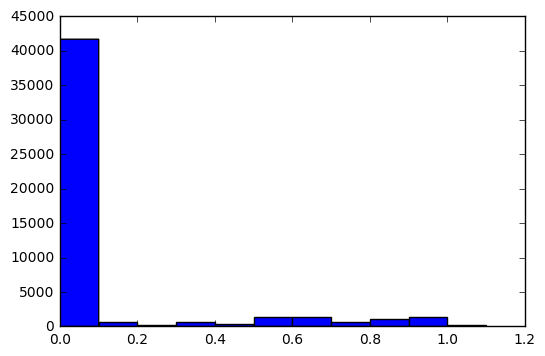

In [185]:
plt.hist(z, bins=np.arange(0,1.2,.1))

In [199]:
from astropy.cosmology import Planck15

In [203]:
Planck15.distmod(z).value

array([ 44.54255957,  44.63146526,  44.51691485, ...,  34.85176079,
        37.34013353,  35.35874726])

In [213]:
mu_err_or_something=np.concatenate(XVals)

In [214]:
len(mu_err_or_something)

43666

In [186]:
z

array([  1.36700896e+00,   1.34614813e+00,   1.31632452e+00, ...,
         8.30270479e-02,   7.58307966e-04,   3.25432115e-02])

In [190]:
z= np.random.uniform(0,.1, NumSN)
len(z)

50000

(array([ 5044.,  5004.,  4883.,  5037.,  4954.,  5064.,  5058.,  4988.,
         4977.,  4991.]),
 array([  2.70892361e-06,   1.00023040e-02,   2.00018991e-02,
          3.00014942e-02,   4.00010893e-02,   5.00006844e-02,
          6.00002795e-02,   6.99998745e-02,   7.99994696e-02,
          8.99990647e-02,   9.99986598e-02]),
 <a list of 10 Patch objects>)

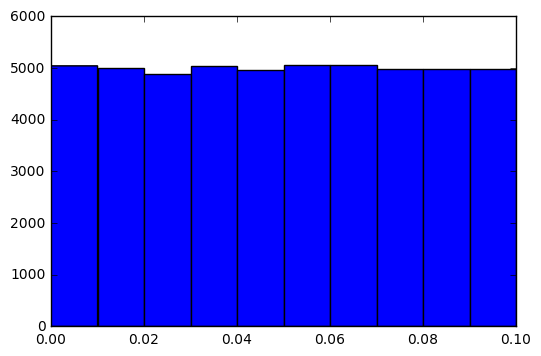

In [167]:
plt.hist(z)

In [31]:
mu_err_table.mu_err['count']

bindex
0.0       1
1.0       6
2.0      14
3.0      55
4.0      89
5.0     108
6.0     152
7.0     206
8.0     228
9.0     236
10.0    257
11.0    195
Name: count, dtype: int64

In [32]:
def numinbins(tab,NumSN):
    x=(tab.mu_err['count']/tab.mu_err['count'].sum())
    return round(x*NumSN).astype(np.int)

In [33]:
numinbins(mu_err_table,2000)

bindex
0.0       1
1.0       8
2.0      18
3.0      71
4.0     115
5.0     140
6.0     197
7.0     266
8.0     295
9.0     305
10.0    332
11.0    252
Name: count, dtype: int32

array([          nan,    1.7257748 ,    1.8562955 ,    1.17330455,
        -23.74221733,   -1.5677139 ,    1.19254091,  -54.84906901,
         -8.34174425,    0.85861875,  -10.34986013, -139.01322727])

In [ ]:
help (np.random.normal)

In [ ]:
help (np.histogram)

In [ ]:
hist, edges= np.histogram(z, bins=10)

In [ ]:
edges

In [ ]:
hist

In [ ]:
print (len(edges))
print (len(hist))

In [ ]:
binz=[]
for i in range(0,10):
    stuff = edges[i]+edges[i+1]
    point = stuff/2
    binz.append (point)
print (binz)

In [ ]:
plt.plot(binz,hist)

In [ ]:
help (np.random.choice)

In [ ]:
wut=[]
for i in range(0,10):
    k = hist[i]/hist.sum()
    wut.append (k)
print (wut)


In [ ]:
print(len(binz))
print(len(wut))

In [ ]:
supernovastuff = np.random.choice(binz,100,p=wut)
print (supernovastuff)

In [ ]:
 hist, edges= np.histogram(supernovastuff, bins=10)

In [ ]:
binzz=[]
for i in range(0,10):
    stufff = edges[i]+edges[i+1]
    pointt = stufff/2
    binzz.append (pointt)
print (binzz)

In [ ]:
plt.plot(binzz,hist)

In [ ]:
supernovastuff = np.random.choice(binz,100,p=wut)
print (supernovastuff)
hist, edges= np.histogram(supernovastuff, bins=10)
binzz=[]
for i in range(0,10):
    stufff = edges[i]+edges[i+1]
    pointt = stufff/2
    binzz.append (pointt)
plt.plot(binzz,hist)